# Assignment 1 - Question 3
The objective of this assignment is to get you familiarize with  the  problem  of  `Linear Regression`.

## Instructions
- Write your code and analysis in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of other cells.
- No inbuilt functions to be used until specified.

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>_A1_Q3.ipynb`.

## 1.3.0 Background about the dataset

TLDR: You have 25 independent variables (`x1, x2, x3, ... , x25`) type: `float` for each data point. You can use a linear combination of these 25 independent variables to predict the y (dependent variable) of each data point.

In [3]:
import csv
import random
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
train_data = list()
with open('train_q3.csv', 'r') as infile:
    input_rows = csv.DictReader(infile)
    for row in input_rows:
        data_point = ([float(row['x1']), float(row['x2']), float(row['x3']),
                       float(row['x4']), float(row['x5']), float(row['x6']),
                        float(row['x7']), float(row['x8']), float(row['x9']),
                        float(row['x10']), float(row['x11']), float(row['x12']),
                        float(row['x13']), float(row['x14']), float(row['x15']),
                        float(row['x16']), float(row['x17']), float(row['x18']),
                        float(row['x19']), float(row['x20']), float(row['x21']),
                        float(row['x22']), float(row['x23']), float(row['x24']),
                        float(row['x25'])], float(row['y']))
        train_data.append(data_point)
        
# each point in x_train has 25 values - 1 for each feature
x_train = [x[0] for x in train_data]
# each point in y_train has 1 value - the 'y' of the molecule
y_train = [x[1] for x in train_data]


test_data = list()
with open('test_q3.csv', 'r') as infile:
    input_rows = csv.DictReader(infile)
    for row in input_rows:
        data_point = ([float(row['x1']), float(row['x2']), float(row['x3']),
                        float(row['x4']), float(row['x5']), float(row['x6']),
                        float(row['x7']), float(row['x8']), float(row['x9']),
                        float(row['x10']), float(row['x11']), float(row['x12']),
                        float(row['x13']), float(row['x14']), float(row['x15']),
                        float(row['x16']), float(row['x17']), float(row['x18']),
                        float(row['x19']), float(row['x20']), float(row['x21']),
                        float(row['x22']), float(row['x23']), float(row['x24']),
                        float(row['x25'])], float(row['y']))
        test_data.append(data_point)

x_test = [x[0] for x in test_data]
y_test = [x[1] for x in test_data]

### 1.3.1 Implement a Linear Regression model that minimizes the MSE **without using any libraries**. You may use NumPy to vectorize your code, but *do not use numpy.polyfit* or anything similar.

1.3.1.1 Explain how you plan to implement Linear Regression in 5-10 lines.

1.3.1.2 Implement Linear Regression using `x_train` and `y_train` as the train dataset.

1.3.2.3 Choose the best learning rate and print the learning rate for which you achieved the best MSE.

1.2.1.4 Make a [Parity Plot](https://en.wikipedia.org/wiki/Parity_plot) of your model's bandgap predictions on the test set with the actual values.

<!-- your answer to 1.3.1.1 -->
`ANSWER 1.3.1.1`

1.3.1.1

1.Divide test data and train data.

2.I am taking four parameters X_train, Y_train, learning_rate, iteration.

3.Define m as the size of the data set and theta will be the vector of zeros.

4.We are running the loop for iteration time. And in every iteration.we will compute our above 4 equations.

5.We will also keep track of our cost at every iteration, by maintaining a cost_list.

6.And finally, return the theta parameter

In [5]:
# 1.3.1.2
# implement Linear Regression
train=pd.read_csv("train_q3.csv")
test=pd.read_csv("test_q3.csv")
# train.head()

In [6]:
train_data = train.values
Y_train = train_data[:, -1].reshape(train_data.shape[0], 1)
X_train = train_data[:, :-1]

In [7]:
test_data = test.values
Y_test = test_data[:, -1].reshape(test_data.shape[0], 1)
X_test = test_data[:, :-1]

In [8]:
X_train = np.vstack((np.ones((X_train.shape[0], )), X_train.T)).T
X_test = np.vstack((np.ones((X_test.shape[0], )), X_test.T)).T

In [9]:
# 1.3.2.3
# try with different learning rates and choose the best one

def gradient_descent(X_train, Y_train, learning_rate, iteration):
  m = Y_train.size
  theta = np.zeros((X_train.shape[1], 1))
  cost_list = []
  for i in range(iteration):
    y_pred = np.dot(X_train, theta)
    cost = (1/(2*m))*np.sum(np.square(y_pred - Y_train))
    d_theta = (1/m)*np.dot(X_train.T, y_pred - Y_train)
    theta = theta - learning_rate*d_theta
    if cost < math.pow(10,-4):
      cost_list.append(cost)
      break
    cost_list.append(cost)
  return theta,cost_list

In [10]:
iteration = 25000
mini_cost=100000
mini_alpha=1 

for learning_rate in range(1,50,1):
  learning_rate=learning_rate/100
  theta, cost_list = gradient_descent(X_train, Y_train, learning_rate = learning_rate, iteration = iteration)
  for i in cost_list:
    if mini_cost>i:
      mini_cost=i
      mini_alpha=learning_rate

print(mini_cost)
print(mini_alpha)

theta, cost_list = gradient_descent(X_train, Y_train, learning_rate = mini_alpha, iteration = iteration)

9.998183494309724e-05
0.42


In [11]:
Y_pred = np.dot(X_test, theta)
# Mean Squared Error
MSE = np.square(np.subtract(Y_test,Y_pred)).mean()
# print(r2_score(Y_test,Y_pred))

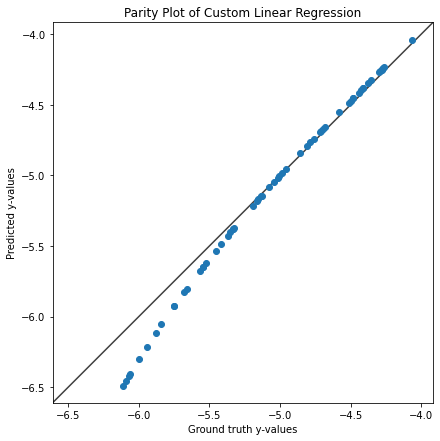

In [12]:
# 1.3.1.4
# Get the predictions of x_test into `y_pred`

fig, ax = plt.subplots(figsize=(7,7))

ax.scatter(y_test, Y_pred)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

ax.set_title('Parity Plot of Custom Linear Regression')
ax.set_xlabel('Ground truth y-values')
ax.set_ylabel('Predicted y-values')
plt.show()

### 1.3.2 Implement Ridge Regression

1.3.2.1 Explain Ridge regression briefly in 1-2 lines.

1.3.2.2 Implement Ridge regression and make a table of different RMSE scores you achieved with different values of alpha. What does the parameter `alpha` do?

1.3.2.3 How does it affect the results here? Explain in 5-10 lines in total. (You can use scikit-learn from this cell onwards)

1.3.2.4 Make a Parity Plot of Ridge Regression model's y-predictions on the test set with the actual values.

1.3.2.1

Ridge regression is a method of estimating the coefficients of multiple-regression models in scenarios where the independent variables are highly correlated. It has been used in many fields,also known as Tikhonov regularization, named for Andrey Tikhonov.It is particularly useful to mitigate the problem of multicollinearity in linear regression, which commonly occurs in models with large numbers of parameters.In general, the method provides improved efficiency in parameter estimation problems in exchange for a tolerable amount of bias.

In [13]:
# 1.3.2.2
# you should not have imported sklearn before this point
import sklearn
from sklearn import linear_model 
from tabulate import tabulate
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

RMSE_lst=[]
alpha_lst=[]
min_alpha=10000
mini_rmse=10000

for alpha in range(1,100,1):
  alpha=alpha/100
  ridge = linear_model.Ridge(alpha = alpha)
  ridge.fit(X_train,Y_train)
  Y_pred=ridge.predict(X_test)
  root_mse_error=np.sqrt(mean_squared_error(Y_test,Y_pred))
  RMSE_lst.append(root_mse_error)
  alpha_lst.append(alpha)
  if mini_rmse>root_mse_error:
    mini_alpha=alpha
    mini_rmse=root_mse_error

data1={
    "Alpha" : alpha_lst,
    "RMSE" : RMSE_lst
}

df=pd.DataFrame(data1)

print(tabulate(df,headers='keys',tablefmt='psql'))

print(mini_rmse)
print(mini_alpha)

# implement Ridge regression and make a table where you explore the effect of different values of `alpha`

+----+---------+-----------+
|    |   Alpha |      RMSE |
|----+---------+-----------|
|  0 |    0.01 | 0.307387  |
|  1 |    0.02 | 0.28284   |
|  2 |    0.03 | 0.247195  |
|  3 |    0.04 | 0.21523   |
|  4 |    0.05 | 0.188346  |
|  5 |    0.06 | 0.166062  |
|  6 |    0.07 | 0.14764   |
|  7 |    0.08 | 0.132405  |
|  8 |    0.09 | 0.119793  |
|  9 |    0.1  | 0.109349  |
| 10 |    0.11 | 0.1007    |
| 11 |    0.12 | 0.0935453 |
| 12 |    0.13 | 0.0876327 |
| 13 |    0.14 | 0.0827542 |
| 14 |    0.15 | 0.0787352 |
| 15 |    0.16 | 0.0754288 |
| 16 |    0.17 | 0.0727114 |
| 17 |    0.18 | 0.0704794 |
| 18 |    0.19 | 0.0686463 |
| 19 |    0.2  | 0.0671399 |
| 20 |    0.21 | 0.0659007 |
| 21 |    0.22 | 0.0648796 |
| 22 |    0.23 | 0.0640365 |
| 23 |    0.24 | 0.0633386 |
| 24 |    0.25 | 0.0627594 |
| 25 |    0.26 | 0.0622773 |
| 26 |    0.27 | 0.0618748 |
| 27 |    0.28 | 0.061538  |
| 28 |    0.29 | 0.0612557 |
| 29 |    0.3  | 0.0610188 |
| 30 |    0.31 | 0.06082   |
| 31 |    0.32

In [14]:
ridge1 = linear_model.Ridge(alpha = mini_alpha)
ridge1.fit(X_train,Y_train)
y_predd=ridge1.predict(X_test)
RMSE = np.sqrt(mean_squared_error(y_predd,y_test))
print(r2_score(y_test,y_predd))
print(RMSE)

0.9891783765390539
0.06007844404726798


1.3.2.3

The alpha is a penalty terms and this value is called Ridge Regression or L2.

penalty function = alpha*slope^2.

When alpha = 0, the penalty is also 0, and so we are just minimizing the sum of the squared residuals.

When alpha asymptotically increase, we arrive to a slope close to 0. so, the larger alpha is, our prediction became less sensitive to the independent variable. We can use Cross-Validation, typically 10-Fold Cross Validation is used in order to determine which alpha give back the lowest VARIANCE.

In Ridge, when we increase the value of alpha, the most important parameters might shrink a little bit and the less important parameter stay at high value.

Alpha is the Tuning Parameter that controls the bias-variance tradeoff and we estimate its best value via cross-validation.


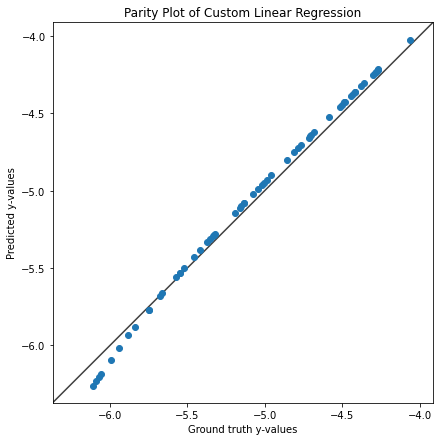

In [15]:
# Get the predictions of x_test into `y_pred`
# 1.3.3.4
fig, ax = plt.subplots(figsize=(7,7))

ax.scatter(y_test, y_predd)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

ax.set_title('Parity Plot of Custom Linear Regression')
ax.set_xlabel('Ground truth y-values')
ax.set_ylabel('Predicted y-values')
plt.show()

### 1.3.3 Implement Lasso Regression
1.3.3.1 Explain Lasso regression briefly in 1-2 lines.

1.3.3.2 Implement Lasso regression and make a table of different RMSE scores you achieved with different values of alpha.

1.3.3.3 What does the parameter `alpha` do? How does it affect the results here? Explain in 5-10 lines in total.

1.3.3.4 Make a Parity Plot of Lasso Regression model's y-predictions on the test set with the actual values.

1.3.3.1

Lasso regression is a regularization technique.It is used over regression methods for a more accurate prediction. This model uses shrinkage. Shrinkage is where data values are shrunk towards a central point as the mean. The lasso procedure encourages models with fewer parameters.This particular type of regression is well-suited for models showing high levels of multicollinearity or when you want to automate certain parts of model selection like parameter elimination.
Lasso Regression uses L1 regularization technique. It is used when we have more features because it automatically performs feature selection.

In [16]:
# 1.3.3.2
# implement Lasso regression and make a table where you explore the effect of different values of `alpha`
import sklearn
from sklearn import linear_model
from sklearn.metrics import r2_score
from tabulate import tabulate
from sklearn.metrics import mean_squared_error

RMSE_lst=[]
alpha_lst=[]
min_alpha=10000
mini_rmse=10000

for alpha in range(1,101,1):
  alpha=alpha/100
  lasso = linear_model.Lasso(alpha = alpha)
  lasso.fit(X_train,Y_train)
  Y_predl=lasso.predict(X_test)
  root_mse_error=np.sqrt(mean_squared_error(Y_test,Y_predl))
  RMSE_lst.append(root_mse_error)
  alpha_lst.append(alpha)
  if mini_rmse>root_mse_error:
    mini_alpha=alpha
    mini_rmse=root_mse_error

data1={
    "Alpha" : alpha_lst,
    "RMSE" : RMSE_lst
}

df=pd.DataFrame(data1)

print(tabulate(df,headers='keys',tablefmt='psql'))

print(mini_rmse)
print(mini_alpha)


+----+---------+-----------+
|    |   Alpha |      RMSE |
|----+---------+-----------|
|  0 |    0.01 | 0.04242   |
|  1 |    0.02 | 0.0845217 |
|  2 |    0.03 | 0.121857  |
|  3 |    0.04 | 0.161956  |
|  4 |    0.05 | 0.20319   |
|  5 |    0.06 | 0.244986  |
|  6 |    0.07 | 0.287099  |
|  7 |    0.08 | 0.329406  |
|  8 |    0.09 | 0.371843  |
|  9 |    0.1  | 0.414369  |
| 10 |    0.11 | 0.456959  |
| 11 |    0.12 | 0.499597  |
| 12 |    0.13 | 0.542271  |
| 13 |    0.14 | 0.584974  |
| 14 |    0.15 | 0.627699  |
| 15 |    0.16 | 0.670443  |
| 16 |    0.17 | 0.713202  |
| 17 |    0.18 | 0.755974  |
| 18 |    0.19 | 0.798756  |
| 19 |    0.2  | 0.841547  |
| 20 |    0.21 | 0.884345  |
| 21 |    0.22 | 0.92715   |
| 22 |    0.23 | 0.969961  |
| 23 |    0.24 | 1.01278   |
| 24 |    0.25 | 1.0556    |
| 25 |    0.26 | 1.09842   |
| 26 |    0.27 | 1.14125   |
| 27 |    0.28 | 1.18408   |
| 28 |    0.29 | 1.22691   |
| 29 |    0.3  | 1.26975   |
| 30 |    0.31 | 1.31259   |
| 31 |    0.32

In [17]:
lasso1 = linear_model.Lasso(alpha = mini_alpha)
lasso1.fit(X_train,Y_train)
y_predd=lasso1.predict(X_test)
RMSE = np.sqrt(mean_squared_error(y_predd,y_test))
print(r2_score(y_test,y_predd))
print(RMSE)

0.9946049480974413
0.04241996255016748


1.3.2.3

The penalty function is now alpha*|slope|.

When alpha = 0, the penalty is also 0, and so we are just minimizing the sum of the squared residuals.

When alpha asymptotically increase, we arrive to a slope close to 0. so, the larger alpha is, our prediction became less sensitive to the independent variable. We can use Cross-Validation, typically 10-Fold Cross Validation is used in order to determine which alpha give back the lowest VARIANCE.

Alpha is the Tuning Parameter that controls the bias-variance tradeoff and we estimate its best value via cross-validation.

In contrast, with Lasso when we increase the value of alpha the most important parameters shrink a little bit and the less important parameters goes closed to zero. So, Lasso is able to exclude silly parameters from the model.


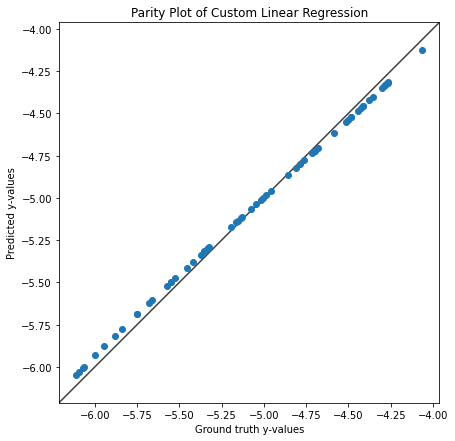

In [18]:
# Get the predictions of x_test into `y_pred`
# 1.3.3.4
fig, ax = plt.subplots(figsize=(7,7))

ax.scatter(y_test, y_predd)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

ax.set_title('Parity Plot of Custom Linear Regression')
ax.set_xlabel('Ground truth y-values')
ax.set_ylabel('Predicted y-values')
plt.show()